In [ ]:
!pip install opencv-python
!pip install pillow

In [384]:
import cv2
import os
import random
import PIL
import matplotlib.pyplot as plt

(720, 1280, 3)


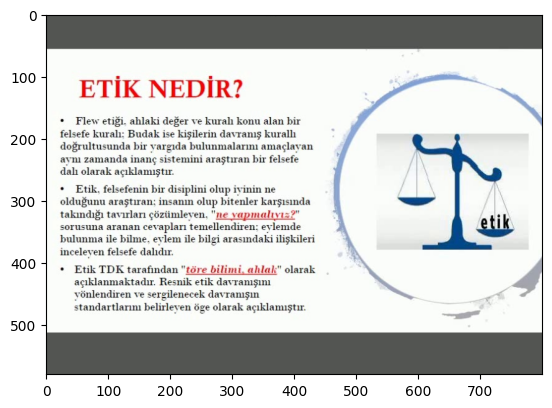

In [ ]:
frame_path = os.path.join(os.getcwd(), "frames3/")
random_frame_img = plt.imread(f"{frame_path}\\{os.listdir(frame_path)[random.randint(0, len(os.listdir(frame_path))-1)]}")
plt.imshow(random_frame_img[100:680, 230:1030])

In [ ]:
import PIL.Image as im

cropped_images = []

for image in os.listdir(frame_path):
    random_frame_path = f"{frame_path}\\{image}"
    random_frame = im.open(random_frame_path)
    rfi_crop = random_frame.crop((230, 100, 1030, 680))
    cropped_images.append(rfi_crop)

cropped_images[0].save(
    os.getcwd, "PDF", resolution=100.0, save_all=True, append_images=cropped_images[1:]
)

In [ ]:
for image in os.listdir(frame_path):
    random_frame = plt.imread(f"{frame_path}\\{image}")[100:680, 230:1030]
    

frame_10.jpg
frame_106.jpg
frame_108.jpg
frame_109.jpg
frame_115.jpg
frame_118.jpg
frame_126.jpg
frame_128.jpg
frame_130.jpg
frame_131.jpg
frame_137.jpg
frame_140.jpg
frame_20.jpg
frame_32.jpg
frame_34.jpg
frame_35.jpg
frame_37.jpg
frame_39.jpg
frame_43.jpg
frame_44.jpg
frame_46.jpg
frame_47.jpg
frame_49.jpg
frame_5.jpg
frame_50.jpg
frame_51.jpg
frame_53.jpg
frame_54.jpg
frame_69.jpg
frame_71.jpg
frame_72.jpg
frame_74.jpg
frame_75.jpg
frame_78.jpg
frame_84.jpg
frame_85.jpg
frame_87.jpg
frame_9.jpg
frame_91.jpg
frame_93.jpg
frame_94.jpg
frame_97.jpg


In [ ]:
def extract_frames(video_path, output_folder):
    video = cv2.VideoCapture(video_path)
    
    fps = video.get(cv2.CAP_PROP_FPS)
    interval = int(fps * 20) # kaç saiyede bir olmalı ?
    # interval = int(fps / 2) # daha hassas işler için böl
    
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    frame_count = 0  
    extracted_count = 0  

    while video.isOpened():
        ret, frame = video.read()
        
        if not ret:
            break

        if frame_count % interval == 0:
            frame_filename = f"{output_folder}/frame_{extracted_count}.jpg"
            cv2.imwrite(frame_filename, frame)
            extracted_count += 1

        frame_count += 1

    video.release()
    print(f"{extracted_count} frame {output_folder} klasörüne kaydedildi.")


video_path = "output_video_no_white.mp4"
output_folder = "frames3"  
extract_frames(video_path, output_folder)

141 frame frames3 klasörüne kaydedildi.


In [ ]:
# istenmeyen imageler silmek için exmp
def delete_unlisted_frames(folder_path, keep_numbers):
    for filename in os.listdir(folder_path):
        if filename.startswith("frame_"):
            try:
                file_number = int(filename.split("frame_")[1].split(".")[0])
                if file_number not in keep_numbers:
                    os.remove(os.path.join(folder_path, filename))
                    print(f"{filename} silindi.")
            except ValueError:
                print(f"{filename} dosya adında numara bulunamadı.")


folder_path = "frames2" 
keep_numbers = {
    21,24,30, 27, 30, 33, 38, 44, 50, 56, 62, 65, 80, 85, 88, 92, 97, 101, 103, 109, 114, 121, 
    126, 130, 135, 140, 144, 150, 157, 162, 166, 170, 174, 179, 187, 193, 197, 203, 210, 
    218, 220, 223, 226, 228, 229, 230
}
delete_unlisted_frames(folder_path, keep_numbers)
